# Neurokit2

Mean Heart Rate: 98.96951881099804


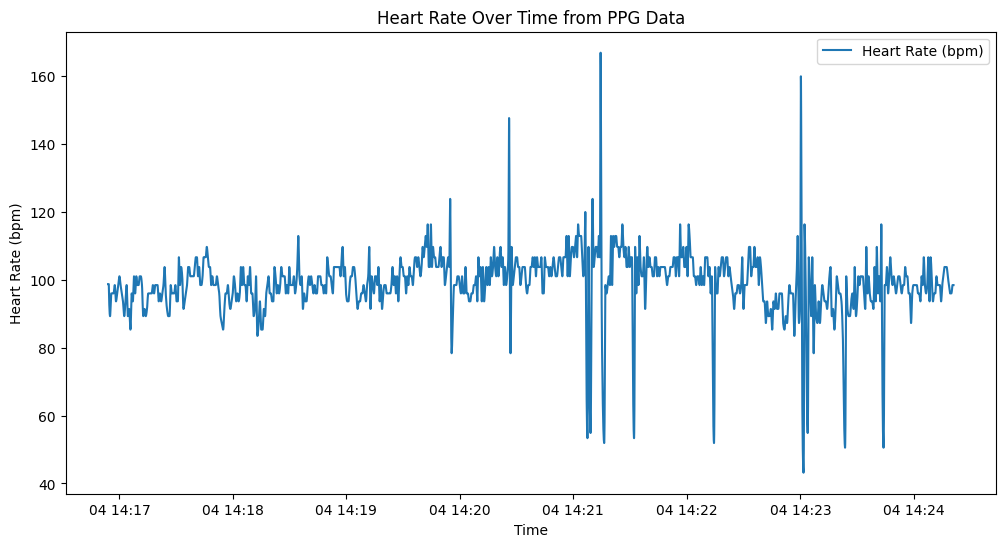

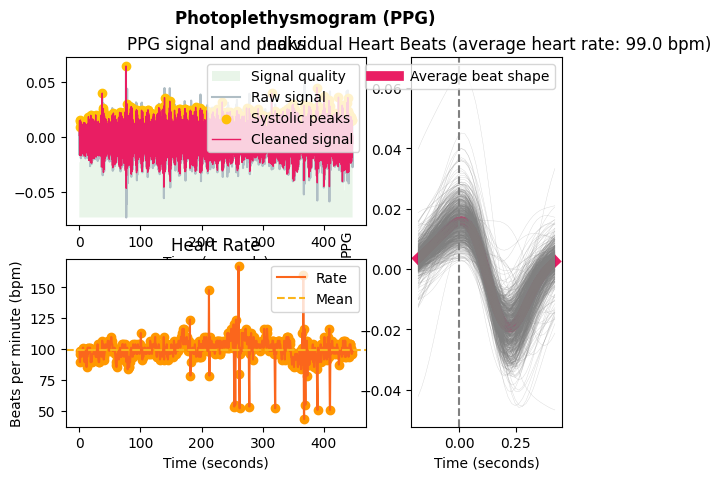

In [16]:
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

# Assume PPG data is sampled at 100 Hz (adjust if needed)
data = pd.read_csv('/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr/sub-2/session-4.csv')
sampling_rate = 64  # Hz

# Process the PPG signal to identify peaks
# ppg_cleaned = nk.ppg_clean(data['PPG_Raw'], sampling_rate=sampling_rate)
# ppg_cleaned = nk.ppg_clean(ppg_cleaned, sampling_rate=sampling_rate)
signals, info = nk.ppg_process(data['PPG_Raw'], sampling_rate=sampling_rate, method_quality='disimilarity')

# Extract heart rate
heart_rate = signals["PPG_Rate"]  # Heart rate in bpm

# Add to DataFrame and plot
data['Heart_Rate'] = heart_rate

mean_bpm = data['Heart_Rate'].mean()
print("Mean Heart Rate:", mean_bpm)


# Plot heart rate over time
plt.figure(figsize=(12, 6))
data['Timestamp']= pd.to_datetime(data['Timestamp'], utc=True)
plt.plot(data['Timestamp'], data['Heart_Rate'], label='Heart Rate (bpm)')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate Over Time from PPG Data')
plt.legend()
plt.show()

nk.ppg_plot(signals, info)

In [15]:
signals

,PPG_Raw,PPG_Clean,PPG_Rate,PPG_Quality,PPG_Peaks
0,0.001930,0.002022,99.141036,-0.000099,0
1,0.001986,0.002009,99.141036,-0.000099,0
2,0.002185,0.002123,99.141036,-0.000099,0
3,0.002620,0.002448,99.141036,-0.000099,0
4,0.003305,0.003006,99.141036,-0.000099,0
...,...,...,...,...,...
28603,-0.005953,-0.005632,98.461538,-0.000029,0
28604,-0.005203,-0.004912,98.461538,-0.000029,0
28605,-0.003794,-0.003560,98.461538,-0.000029,0
28606,-0.001864,-0.001718,98.461538,-0.000029,0


In [12]:
ppg_cleaned

array([ 1.33581996e-03,  1.49937421e-03,  1.84278832e-03, ...,
       -4.38179238e-03, -2.36858298e-03, -3.65817123e-05])

# rapidHRV

https://github.com/peterakirk/RapidHRV/blob/main/resources/tutorial.ipynb

In [6]:
import pandas as pd
import rapidhrv as rhv
# Load your PPG data
data = pd.read_csv('/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr/sub-2/session-4.csv')

# Extract PPG signal
ppg_signal = data['PPG_Raw']  # Make sure this matches your actual column name
sampling_rate = 64  # Adjust as necessary
signal = rhv.Signal(data=ppg_signal.values, sample_rate=sampling_rate)
preprocessed = rhv.preprocess(signal, resample_rate=64)
analyzed = rhv.analyze(preprocessed)
rhv.visualize(analyzed)


# Explore the analyzed HRV data
# print(analyzed)

mean_bpm = analyzed['BPM'].mean()
print("Mean BPM:", mean_bpm)

Mean BPM: 79.11890135684304


In [8]:
import numpy as np
import cvxopt as cv
import cvxopt.solvers

ModuleNotFoundError: No module named 'cvxopt'

# Specific time-point analysis

In [1]:
import os
import pytz
import pandas as pd

# Function to convert EST/EDT time to UTC
def convert_est_edt_to_utc(eastern_time):
    eastern = pytz.timezone('America/New_York')
    eastern_time = eastern.localize(eastern_time)
    utc_time = eastern_time.astimezone(pytz.utc)
    return utc_time

# Define the root folder path
root_folder = '/Users/dhwanishah/Desktop/MS/VR-Study/VRTL/filtered_camera_data'
output_file = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/camera_timestamps_.xlsx'

# Initialize a list to store file information
file_data = []

# Define the subjects, sessions, and cameras of interest
subjects = ['VRTL3', 'VRTL9', 'VRTL10', 'VRTL11']
sessions = ['S4', 'S5', 'S6']
cameras = ['Camera5', 'Camera6', 'Camera7']

# Iterate over each subject
for subject in subjects:
    subject_folder = os.path.join(root_folder, subject)
    
    # Ensure the subject folder exists
    if not os.path.exists(subject_folder):
        continue
    
    # Iterate over each file in the subject folder
    for file_name in os.listdir(subject_folder):
        # Check if the file matches the session and camera criteria
        if any(session in file_name for session in sessions) and any(camera in file_name for camera in cameras):
            file_path = os.path.join(subject_folder, file_name)
            
            # Load the CSV file
            try:
                df = pd.read_csv(file_path)
                
                # Check if 'SysTime' column exists
                if ' SysTime' in df.columns:
                    print(f"Processing File: {file_name}")
                    
                    # Convert and print the first and last timestamps in UTC
                    first_timestamp_est = pd.to_datetime(df[' SysTime'].iloc[0])
                    last_timestamp_est = pd.to_datetime(df[' SysTime'].iloc[-1])

                    first_timestamp_utc = convert_est_edt_to_utc(first_timestamp_est)
                    last_timestamp_utc = convert_est_edt_to_utc(last_timestamp_est)
                    
                    # Append file information to the list
                    # file_data.append({
                    #     "File name": file_name,
                    #     "Start time": first_timestamp_utc,
                    #     "End time": last_timestamp_utc
                    # })
                    print(f"  First Timestamp (UTC): {first_timestamp_utc}")
                    print(f"  Last Timestamp (UTC): {last_timestamp_utc}\n")
                else:
                    print(f"File: {file_name} - 'SysTime' column not found. Available columns: {df.columns.tolist()}")
            except Exception as e:
                print(f"Could not process file: {file_name} - Error: {e}")

# # Convert the data to a DataFrame and save to an Excel file
# output_df = pd.DataFrame(file_data)
# output_df.to_excel(output_file, index=False)

# print(f"Data has been saved to {output_file}")

Processing File: VRTL3S6_Camera5.csv
  First Timestamp (UTC): 2024-04-19 14:27:52+00:00
  Last Timestamp (UTC): 2024-04-19 14:28:54+00:00

Processing File: VRTL3S6_Camera6.csv
  First Timestamp (UTC): 2024-04-19 14:28:54+00:00
  Last Timestamp (UTC): 2024-04-19 14:29:57+00:00

Processing File: VRTL3S6_Camera7.csv
  First Timestamp (UTC): 2024-04-19 14:29:57+00:00
  Last Timestamp (UTC): 2024-04-19 14:30:58+00:00

Processing File: VRTL3S5_Camera7.csv
  First Timestamp (UTC): 2024-04-19 14:21:34+00:00
  Last Timestamp (UTC): 2024-04-19 14:22:35+00:00

Processing File: VRTL3S5_Camera6.csv
  First Timestamp (UTC): 2024-04-19 14:20:32+00:00
  Last Timestamp (UTC): 2024-04-19 14:21:34+00:00

Processing File: VRTL3S5_Camera5.csv
  First Timestamp (UTC): 2024-04-19 14:19:29+00:00
  Last Timestamp (UTC): 2024-04-19 14:20:32+00:00

Processing File: VRTL3S4_Camera5.csv
  First Timestamp (UTC): 2024-04-18 16:49:55+00:00
  Last Timestamp (UTC): 2024-04-18 16:51:00+00:00

Processing File: VRTL3S4_Ca